In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
#设置运行设备 GPU/CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10))
    def forward(self,x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits
        

In [8]:
#We create an instance of NeuralNetwork, and move it to the device, and print its structure.
model=NeuralNetwork().to(device)


In [32]:
input_image=torch.rand(3,28,28)
flatten=nn.Flatten()
flat_image=flatten(input_image) #flat_image.size:784*784*3
layer1=nn.Linear(in_features=28*28,out_features=10)
hidden1=layer1(flat_image)
print(hidden1) #图像有3层，显示3组权重
hidden1=nn.ReLU()(hidden1)
print(hidden1)

tensor([[-0.5459,  0.2863,  0.0435, -0.5460, -0.2305, -0.1295, -0.0566, -0.0499,
         -0.1892, -0.5126],
        [-0.7996,  0.2559,  0.0017, -0.4476, -0.5436,  0.1044, -0.1594, -0.2118,
         -0.0320, -0.1577],
        [-0.6698,  0.2804, -0.1844, -0.1369, -0.5267,  0.5737, -0.2762, -0.1499,
         -0.1796, -0.3589]], grad_fn=<AddmmBackward>)
tensor([[0.0000, 0.2863, 0.0435, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.2559, 0.0017, 0.0000, 0.0000, 0.1044, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.2804, 0.0000, 0.0000, 0.0000, 0.5737, 0.0000, 0.0000, 0.0000,
         0.0000]], grad_fn=<ReluBackward0>)


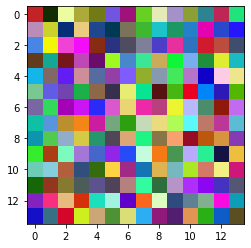

In [11]:
from matplotlib.pylab import plt
input_image=torch.rand(14,14,3)
plt.imshow(input_image)

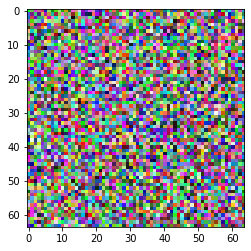

In [10]:
import numpy as np
img=np.random.randint(0,256,size=(64,64,3))
plt.imshow(img[:,:,::-1])
plt.show()

In [50]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
print(z.grad_fn)
print(loss.grad_fn)

In [51]:
loss.backward()   #反向传播，计算梯度
print(w.grad)
print(b.grad)

tensor([[0.2427, 0.0788, 0.2109],
        [0.2427, 0.0788, 0.2109],
        [0.2427, 0.0788, 0.2109],
        [0.2427, 0.0788, 0.2109],
        [0.2427, 0.0788, 0.2109]])
tensor([0.2427, 0.0788, 0.2109])


### stop tracing:

In [53]:
#by defalut,all tensor with requires_grad=True
z=torch.matmul(x,w)+b
print(z.requires_grad)
# only want to do forward computations through the network. 
# We can stop tracking computations by surrounding our computation code 
# with torch.no_grad() block
with torch.no_grad():  
    z=torch.matmul(x,w)+b
print(z.requires_grad)
# Another way to achieve the same result is to use the detach() method on the tensor
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

True
False
False


In [65]:
# Notice that when we call backward for the second time with the same argument, 
# the value of the gradient is different. 
# This happens because when doing backward propagation, 
# PyTorch accumulates the gradients,
# i.e. the value of computed gradients is added to the grad property of all 
# leaf nodes of computational graph. 
# If you want to compute the proper gradients, you need to zero out the grad property before.
# In real-life training an optimizer helps us to do this.
inp = torch.eye(5, requires_grad=True)
print(inp)
out = (inp+1).pow(2) #pow：平方
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]], requires_grad=True)
First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


In [63]:
(inp+1).pow(2)

tensor([[4., 1., 1., 1., 1.],
        [1., 4., 1., 1., 1.],
        [1., 1., 4., 1., 1.],
        [1., 1., 1., 4., 1.],
        [1., 1., 1., 1., 4.]], grad_fn=<PowBackward0>)

In [70]:
inp1=torch.ones_like(inp)
(inp1+1).pow(2)

tensor([[4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.]])